# Recovering data from seismic

Requirements:

- `numpy`
- `scipy`
- `scikit-learn`
- `pillow`

I recommend installing them with `conda install`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/matt/anaconda/envs/rainbow/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/matt/anaconda/envs/rainbow/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Make a synthetic image

In [2]:
from scipy import signal

nx, ny = 100, 100
z = np.random.rand(nx, ny)

sizex, sizey = 30, 30
x, y = np.mgrid[-sizex:sizex+1, -sizey:sizey+1]
g = np.exp(-0.333*(x**2/float(sizex)+y**2/float(sizey)))
f = g/g.sum()

z = signal.convolve(z, f, mode='valid')
z = (z - z.min())/(z.max() - z.min())

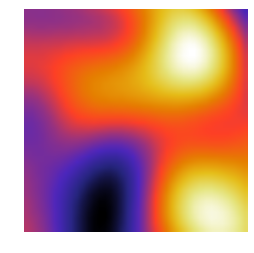

In [3]:
# Note: interpolation introduces new colours.
plt.imshow(z, cmap="CMRmap")
#plt.imshow(z, cmap="spectral", interpolation='none')

plt.axis('off')
plt.savefig('data/cbar/test.png', bbox_inches='tight')
plt.show()

In [4]:
cmaps = [('Perceptually Uniform Sequential',
                            ['viridis', 'inferno', 'plasma', 'magma']),
         ('Sequential',     ['Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
                             'copper', 'gist_heat', 'gray', 'hot',
                             'pink', 'spring', 'summer', 'winter']),
         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism'])]

## Make a seismic image

Make some fake data in the closed interval [0,1] and apply a colourmap.

In [2]:
volume = np.load('data/F3_volume_3x3_16bit.npy')

In [4]:
cmap = 'viridis'    # Perceptual
cmap = 'spectral'   # Classic rainbow
cmap = 'seismic'    # Classic diverging
cmap = 'Accent'     # Needs coolinearity constraint
cmap = 'Dark2'      # Needs coolinearity constraint
cmap = 'Paired'     # Needs coolinearity constraint, ultimate test!
cmap = 'gist_ncar'  # Works with new cool-point start location
cmap = 'Pastel1'    # Amazing that it works for start point
cmap = 'Set2'       # Difficult

# cmap = 'Greys'
cmap = 'RdBu'

In [5]:
cd ~/Dropbox/dev/rainbow/notebooks

/home/matt/Dropbox/dev/rainbow/notebooks


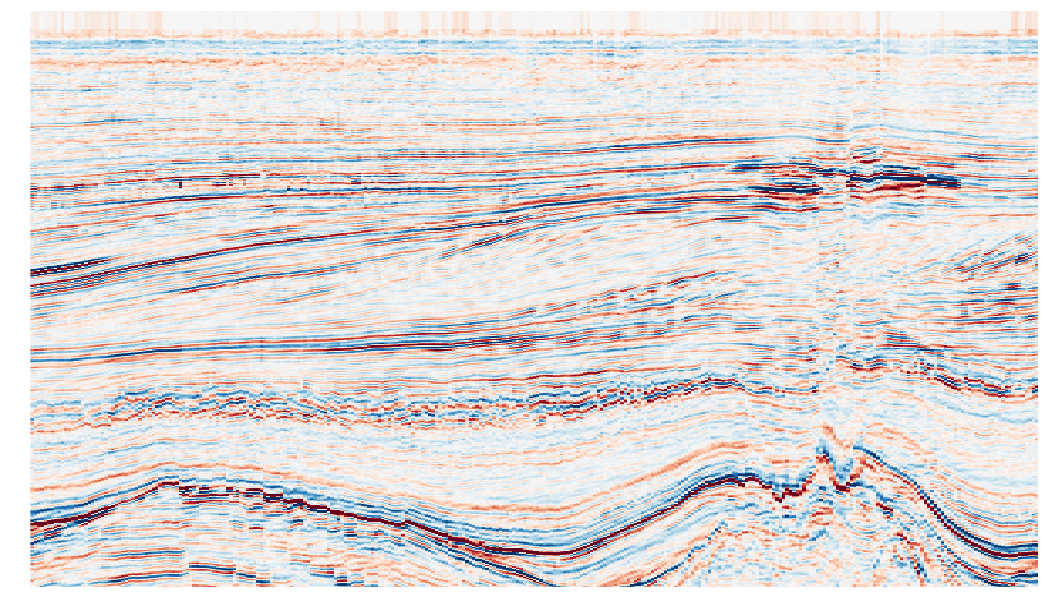

In [21]:
z = volume[20].T

fig = plt.figure(frameon=False)
fig.set_size_inches(14,8)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

vm = np.percentile(z, 99.5)

# Note: interpolation introduces new colours.
plt.imshow(z, cmap=cmap, aspect='auto', interpolation='none', vmin=-vm, vmax=vm)
#plt.imshow(z, cmap=cmap, aspect='auto', vmin=-vm, vmax=vm)

fig.savefig('data/cbar/test.png')

## Read an image

In [22]:
cd ~/Dropbox/dev/rainbow/notebooks

/home/matt/Dropbox/dev/rainbow/notebooks


In [23]:
ls data/cbar

boxer.png                                    salt_minibasin.jpg
candy.jpg                                    seismic2.png
ceres_NASA_JPL-Caltech_UCLA_MPS_DLR_IDA.png  seismic3_perspective.png
Colormap_Jet1.png                            seismic3.png
deptuck_salt.jpg                             seismic.png
drainage.jpg                                 seismic_poor.jpg
fft_basics_03.png                            seismic_poor_processed.png
fft_basics_crop.png                          tee-rump.jpg
fluid.png                                    test.jpg
Gram_Ganssle.jpg                             test.png
hands.png                                    timeslice.jpg
lisa.png                                     tle_cover.png
mars.jpg                                     uruguay_seismic.jpg
redblu.png                                   velocity_field.png


In [24]:
cd ~/Dropbox/dev/rainbow/notebooks

/home/matt/Dropbox/dev/rainbow/notebooks


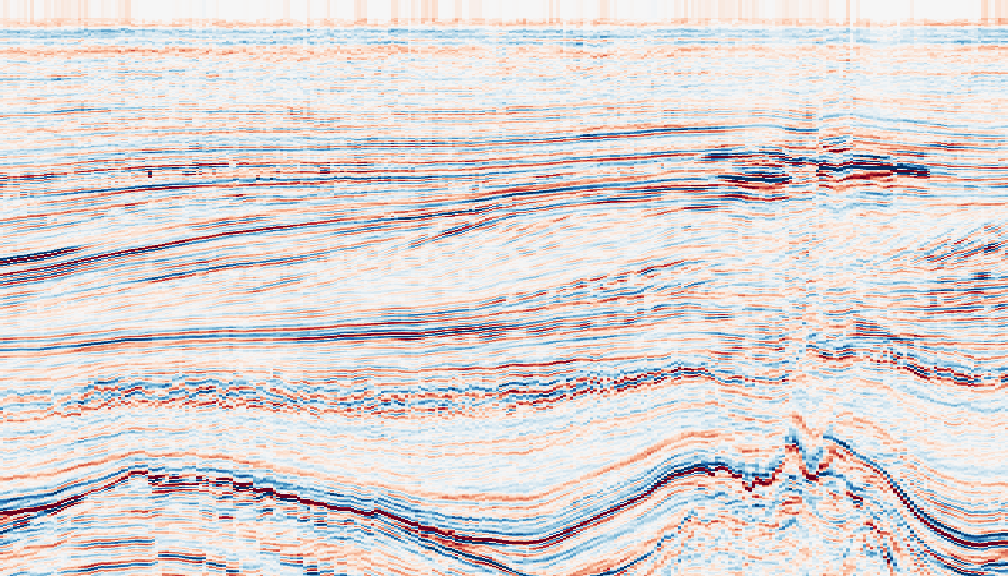

In [25]:
from PIL import Image

# img = Image.open('data/cbar/boxer.png')
# img = Image.open('data/cbar/fluid.png')
# img = Image.open('data/cbar/lisa.png')
#img = Image.open('data/cbar/redblu.png')
#img = Image.open('data/cbar/seismic.png')
#img = Image.open('data/cbar/seismic2.png')
#img = Image.open('data/cbar/seismic3.png')
#img = Image.open('data/cbar/seismic_poor_processed.png')
# img = Image.open('data/cbar/drainage.jpg')
# img = Image.open('data/cbar/mars.jpg')
#img = Image.open('data/cbar/deptuck_salt.jpg')
#img = Image.open("data/cbar/uruguay_seismic.jpg")
#img = Image.open('data/cbar/velocity_field.png')
#img = Image.open('noholes.png')
img = Image.open('data/cbar/test.png')

img

In [26]:
img.size

(1008, 576)

Instead of taking a random sample, let's take all pixels from a smaller version of the image.

**Problem: This will probably change the colours, or at least lose some.**

In [27]:
# def resize_if_necessary(img, max_size=256):
#     h, w = img.size
#     if h * w > max_size**2:
#         img = img.resize((max_size, max_size))
#     return img

In [28]:
# img_sm = resize_if_necessary(img)

Cast as an array, and ignore the last channel (alpha), if there is one.

## Quantize with scikit

In [29]:
n_colours = 128

In [30]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [31]:
im = np.asarray(img)[..., :3] / 255.

In [32]:
h, w, d = im.shape
im_ = im.reshape((w * h, d))

# Define training set: 100 times n_colours, up to 10% of the image.
n = min(h*w//10, n_colours*100)
sample = shuffle(im_, random_state=0)[:n]
px = sample.reshape((-1, sample.shape[-1]))

For seismic data, it might be more sensible to sample entire traces, rather than individual samples. Taking traces seems more likely to sample the full colourmap.

In [33]:
# n = min(h*w//10, n_colours*100)
# ntr = n // im.shape[1]  # How many traces do we need?

# traces = np.random.randint(0, im.shape[0], ntr)
# sample = im[traces]
# px = sample.reshape((-1, sample.shape[-1]))

**Actually this seems to be worse than random sampling.**

I really want to make sure we get the endpoints, since we're sure to get plenty of pixels around 0. But I can't think of a good way to do this.

In [34]:
# Use all the pixels.
# You can use -1 as one of the dimensions; NumPy will calculate it from the others.
# px = im.reshape((-1, im.shape[-1]))

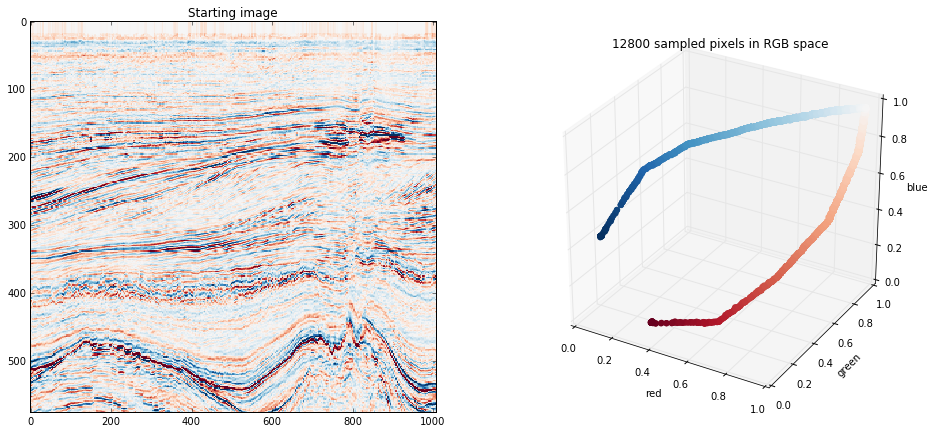

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure
fig = plt.figure(figsize=(16, 7))

ax0 = fig.add_subplot(121)
plt.imshow(im, interpolation='none', aspect='auto')
ax0.set_title("Starting image")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(*px.T, c=px, lw=0, s=40, alpha=1)
ax.set_title('{} sampled pixels in RGB space'.format(n))
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.savefig('image_and_colourmap.png', bbox_inches='tight', dpi=300)
plt.show()

Train:

In [36]:
kmeans = KMeans(n_clusters=n_colours).fit(px)

Now I can make an RGB palette `p` — also known as a codebook in information theory terms:

In [37]:
p = kmeans.cluster_centers_

# I don't know why I need to do this, but I do. Floating point precision maybe.
p[p > 1] = 1
p[p < 0] = 0

The only problem with this `p` is that it is not in order — that it, there cluster centres are more or less randomly arranged. We will fix that in the next section.

The vector `p` is actually all we need, but if you want to see what the quantized image looks like, carry on.

Note that we can do the codebook lookup 

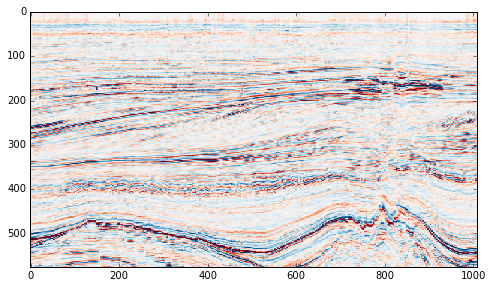

In [38]:
labels = kmeans.predict(im_)

plt.figure(figsize=(8, 8))
plt.imshow(p[labels].reshape((h, w, 3)))
plt.show()

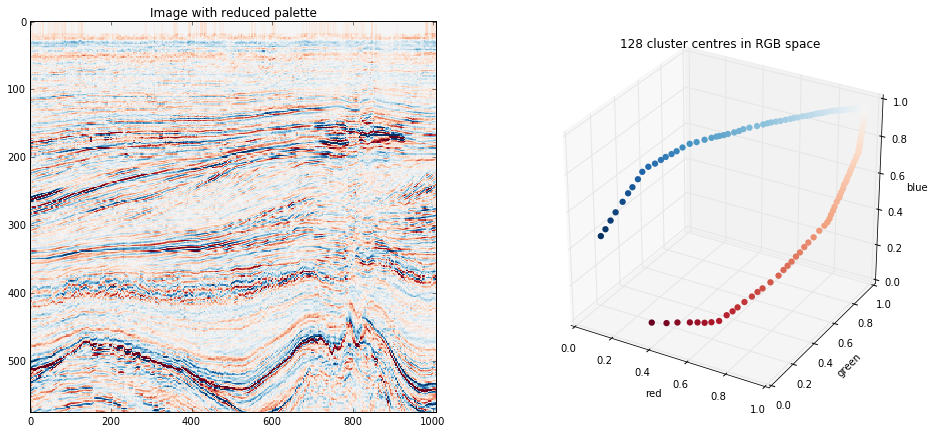

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure
fig = plt.figure(figsize=(16, 7))

ax0 = fig.add_subplot(121)
plt.imshow(p[labels].reshape((h, w, 3)), interpolation='none', aspect='auto')
ax0.set_title("Image with reduced palette")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(*p.T, c=p, lw=0, s=40, alpha=1)
ax.set_title('{} cluster centres in RGB space'.format(n_colours))
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.savefig('reduced_image_and_colourmap.png', dpi=300)
plt.show()

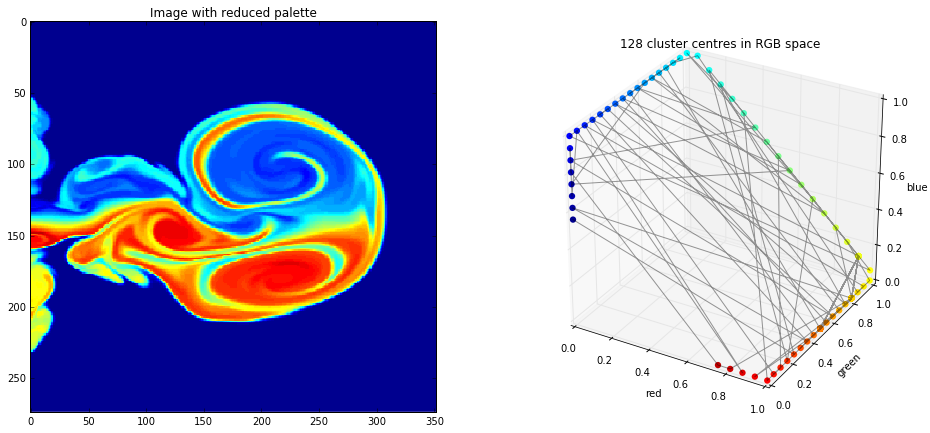

In [78]:
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure
fig = plt.figure(figsize=(16, 7))

ax0 = fig.add_subplot(121)
plt.imshow(p[labels].reshape((h, w, 3)), interpolation='none', aspect='auto')
ax0.set_title("Image with reduced palette")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(*p.T, c=p, lw=0, s=40, alpha=1)
ax.plot(*p.T, color='k', alpha=0.4)
ax.set_title('{} cluster centres in RGB space'.format(n_colours))
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.savefig('reduced_image_and_colourmap_2.png', bbox_inches='tight', dpi=300)
plt.show()

In [79]:
px[:, 2].shape

(9644,)

## Duplicate colours

In [343]:
from sklearn.neighbors import BallTree

def mask_colours(a, tree, colours, tolerance=1e-3, leave=0):
    target = tree.query_radius(colours, tolerance)
    return list(target[0][1:])
    mask = np.ones(a.shape[0], dtype=bool)
    end = None if leave < 2 else 1 - leave
    for t in target:
        mask[t[leave:end]] = False
    return a[mask]

def remove_duplicates(a, tree, tolerance=1e-3):
    newa = []
    for c in a:
        newa += mask_colours(a, tree, [c], leave=1)
        #a = mask_colours(a, tree, [c], leave=1)
    return newa

In [344]:
# tree = BallTree(p)
# newp = remove_duplicates(p, tree)
# p = p[list(set(newp))]
# len(newp)

## MARS on all the data

In [53]:
# from pyearth import Earth

# # Fit an Earth model.
# model = Earth()
# model.fit(px[:, :2], px[:, 2])

# b_hat = model.predict(px[:, :2])

In [54]:
#n = np.stack([px[:, :2], [b_hat]])

In [55]:
# b_hat.shape

## Travelling salesman problem

Remember that these points are essentially in random order:

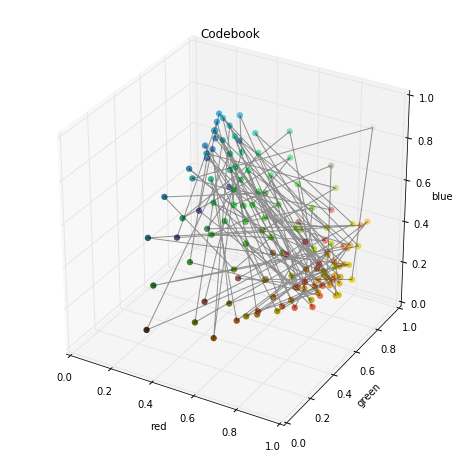

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure
fig = plt.figure(figsize=(8, 8))

# Result of TSP solver
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*p.T, c=p, lw=0, s=40, alpha=1)
ax.plot(*p.T, color='k', alpha=0.4)
ax.set_title('Codebook')
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.show()

I propose starting at the dark end (the end of the line nearest black) and crawling aling the line of points from there. This will make a nice organized sequence of codes — in our case, this will be the colourmap.

We can solve this problem as the travelling salesman problem. Find the shortest tour from black (see below) to 'the other end'.

To start with, we need the distances between all points. This is just a norm, but there's a convenient function `scipy.spatial.pdist` for finding distance pairs in *n*-space. Then `squareform` casts it into a square symmetric matrix, which is what we need for our TSP solver.

Other than creating a naive TSP solver in Python – let's face it, it'll be broken or slow or non-optimal — there are three good TSP solver options:

* [LKH](http://www.akira.ruc.dk/~keld/research/LKH/) — [parameter help here](http://webhotel4.ruc.dk/~keld/research/LKH/LKH-2.0/DOC/LKH-2.0_PARAMETERS.pdf).
* [Concorde](http://www.math.uwaterloo.ca/tsp/concorde.html) (I followed [these instructions](http://davidsjohnson.net/TSPcourse/mac-install-concorde.txt) for installing concorde on my Mac.)
* [O-R tools](https://developers.google.com/optimization/routing/tsp)

LKH and Concorde can be used via [the TSP Python package](https://github.com/perrygeo/pytsp) (but note that it used to be called `pyconcorde` so you need to change the names of some functions — look at the source or use [my fork](https://github.com/kwinkunks/pytsp).

Note that you need to add the Concorde and LKH libs to PATH as mentioned in the docs for `pytsp`.

In [80]:
from pytsp import run, dumps_matrix

We need to start the traversal of the locus somewhere.

Possible heuristics:

* At the end nearest black: we tend to map darker colours to lower values.
* At the cool end: we tend to map cool colours.
* At the apparent start of the line. We might be able to guess where it is: the ends of the line should be the only two points for which the second-closest point is roughly twice as far away as the very closest point. Most points have two points about the same distance away (one on either side). So if we figure out the median (say) smallest non-zero point distance, we can make this estimate.

Blending the first two ideas, I am now starting at (0.25, 0, 0.5). It's the cool-point. (Only 0.25 red because if it's a toss-up between blue and red, I want blue.)

If I include the third idea — choose the dark-bluest end-point candidate — I think it should do better than it is now.

### Using a dark-blue-magenta end point

Aaaanyway, Adding this point allows us to start the TSP there, because it will move to the next nearest point — I think. We will remove it later.

Add cool-point to `p`:

In [81]:
p = np.vstack([[[0, 0, 0.1]], p])
# p = np.vstack([[[0, 0, 0.5]], pts])

In [82]:
p[:6]

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e-01],
       [  0.00000000e+00,   8.63198402e-15,   5.60784314e-01],
       [  1.00000000e+00,   2.47058824e-01,   7.77156117e-16],
       [  1.84313725e-01,   1.00000000e+00,   8.74509804e-01],
       [  1.00000000e+00,   7.49019608e-01,   6.66133815e-16],
       [  0.00000000e+00,   3.72549020e-01,   1.00000000e+00]])

Remember that these points are essentially in random order. We are going to solve the find the shortest Hamiltonian path to organize them.

To do this, we need weights for the edges — and we'll use the distances between the points. There's a convenient function, `scipy.spatial.pdist` for finding distances in *n*-space. We will use the 2-norm, but [the `pdist` function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) has a great many other metrics.

The convenience function `squareform` organizes the distances into a matrix.

In [83]:
from scipy.spatial.distance import pdist, squareform

# Make distance matrix.
dists = squareform(pdist(p, 'euclidean'))

# The values in `dists` are floats in the range 0 to sqrt(3). 
# Normalize the values to int16s.
d = (2**16//2 - 1) * dists / np.sqrt(3)
d = d.astype(np.int16)

# To use a TSP algo to solve the shortest Hamiltonian path problem,
# we need to add a point that is zero units from every other point.
row, col = dists.shape
d = np.insert(d, row, 0, axis=0)
d = np.insert(d, col, 0, axis=1)

In [84]:
d

array([[    0,  8717, 19578, ..., 24439, 21218,     0],
       [ 8717,     0, 22187, ..., 26575, 23647,     0],
       [19578, 22187,     0, ..., 10683,  4748,     0],
       ..., 
       [24439, 26575, 10683, ...,     0,  5935,     0],
       [21218, 23647,  4748, ...,  5935,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int16)

The zero-point trick is legit. [Reference](http://stackoverflow.com/questions/6733999/what-is-the-problem-name-for-traveling-salesman-problemtsp-without-considering) from E. L. Lawler, Jan Karel Lenstra, A. H. G. Rinnooy Kan, D. B. Shmoys (1985). The Traveling Salesman Problem: A Guided Tour of Combinatorial Optimization, 1st Edition. Wiley. 476 pp. ISBN 978-0471904137.

LKH implementation.

K. Helsgaun (2009). General k-opt submoves for the Lin-Kernighan TSP heuristic. Mathematical Programming Computation, 2009, doi: 10.1007/s12532-009-0004-6.

In [85]:
outf = "/tmp/myroute_lkh.tsp"
with open(outf, 'w') as f:
    f.write(dumps_matrix(d, name="My Route"))

In [86]:
tour_lkh = run(outf, start=0, solver="LKH")

In [87]:
#result = np.array(tour_concorde['tour'])
result = np.array(tour_lkh['tour'])

In [88]:
result

array([  0,   1,  25,  57,  43,  59,  20,  58,  15,  56,  54,  10,  23,
        22,   5,  41,  49,  18,  44,   7,  45,  13,  50,  14,  31,  51,
        28,   3,  32,  33,  19,   8,  36,  42,  17,  30,   6,  27,  37,
        92,   9,  95,  93,  91, 101, 113, 110,  69,  88,  73, 124, 115,
        66, 118, 107, 102, 117,  16,  38,  53,  52,  79,  80,  71,  65,
        84,  99,  78,  96,  70, 104, 127, 108,  26, 126,  75,  98,  62,
        68, 109,   4,  46,  21,  40, 111, 103, 100, 106, 105,  97,  94,
       112,  87, 114,  89, 123,  12,  76,  83, 119,  63, 120,  77, 125,
        74,  85,  72, 121, 128, 122,  90,  64,  86,  67, 116,  82,  81,
        48,  24,  39,   2,  29,  35,  11,  34,  47,  55,  61,  60, 129])

In [89]:
assert result.size == n_colours + 2

In [90]:
e = np.asscalar(np.where(result == result.size-1)[0])

if e == 1:
    # Then it's second and I think I know why.
    # As long as it went to the last point next, and I think
    # it necessarily does, then we're good.
    print("Zero-point is second. Probably dealt with it.")
    result = np.concatenate([result[:e], result[e+1::][::-1]])
elif e == len(result)-1:
    # Then it's at the end already.
    print("Zero-point is at the end. Dealt with it.")
    result = result[:-1]
else:
    # I'm not sure why this would happen... but I Think in this
    # case we can just skip it.
    print("Zero-point is somewhere weird. Maybe dealt with... BE CAREFUL.")
    result = result[result != result.size-1]

assert len(result) == len(p)

r = result[1:]


Zero-point is at the end. Dealt with it.


Now `result` is the indices of points for the shortest path, shape `(256,)`. And `p` is our quantized colormap, shape `(256, 3)`. So we can select the points easily for an ordered colourmap.

The offsets are to account for the fact that we added a dark-blue point at the start and a zero point at the end.

In [91]:
#r = result[1:-1]
c = p[r]

We need the distances from each point to the next.

In [92]:
dataspace = np.concatenate([[0], np.cumsum([d[p, q] for p, q in zip(r, r[1:])])])

In [93]:
# Normalize to [0, 1]
dataspace = dataspace/np.max(dataspace)

In [94]:
dataspace

array([ 0.        ,  0.01516255,  0.03032509,  0.04548764,  0.06065019,
        0.07581274,  0.09097528,  0.10613783,  0.12034234,  0.13550489,
        0.15066743,  0.16582998,  0.18099253,  0.19615507,  0.21131762,
        0.22648017,  0.24164272,  0.25680526,  0.27196781,  0.28713036,
        0.3022929 ,  0.31745545,  0.332618  ,  0.34778055,  0.36198505,
        0.38341956,  0.40485406,  0.42628856,  0.44772306,  0.46915757,
        0.49059207,  0.51202657,  0.53346107,  0.55489557,  0.57633008,
        0.59776458,  0.61919908,  0.64063358,  0.66206808,  0.66206808,
        0.66206808,  0.66206808,  0.66206808,  0.66206808,  0.66206808,
        0.66206808,  0.66206808,  0.66206808,  0.66206808,  0.66206808,
        0.66206808,  0.66206808,  0.66206808,  0.66206808,  0.66206808,
        0.66206808,  0.68350259,  0.6977071 ,  0.71286964,  0.72803219,
        0.74319474,  0.74319474,  0.74319474,  0.74319474,  0.74319474,
        0.74319474,  0.74319474,  0.74319474,  0.74319474,  0.74

In fact, we should probably not do this for seismic data. The assumption is that all the colours in the colourmap are represented in the data image. This is not necessarily true for a map, but it probably is for seismic. 

So let's do this instead:

In [488]:
# For seismic
dataspace = np.arange(0, len(c))

In [489]:
dataspace

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

Now let's look at it all.

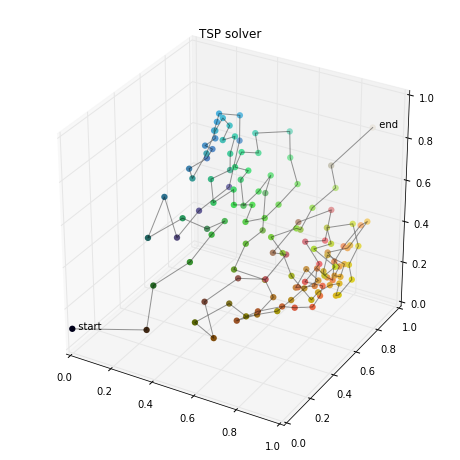

In [61]:
from mpl_toolkits.mplot3d import Axes3D
# Set up the figure
fig = plt.figure(figsize=(8, 8))

c = p[result]
# c = p[r]

# Result of TSP solver
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*c.T, c=c, lw=0, s=40, alpha=1)
ax.plot(*c.T, color='k', alpha=0.4)
ax.text(*c[0], '  start')
ax.text(*c[-1], '  end')
ax.set_title('TSP solver')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

plt.show()

In [95]:
c = p[r]

## Back to colinearity: nearest neighbours

Trying to solve issue with `seismic2.png`. 

In [96]:
from sklearn.neighbors import BallTree
tree = BallTree(p)

# Get 2 nearest neighbours and include 'self'
_, idx = tree.query(p, 3)
triples = p[idx]

In [97]:
colin = 1 - np.power(np.abs(np.linalg.det(triples)), 0.25)  # 1 = colinear, 0 = not at all

np.max(colin)

1.0

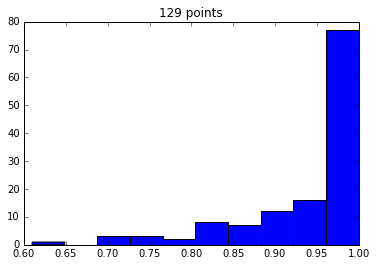

In [510]:
plt.hist(colin)
plt.title('{} points'.format(colin.size))
plt.show()

In [287]:
# Lose every triple with below-average colinearity.
onlyc = triples[colin > colin.mean()]
onlyi = idx[colin > colin.mean()]

# What about only eliminating points that are not part of at least two nearest-neighbour colinear triples?

# What about using median as cutoff instead of mean?

In [213]:
len(qi)

NameError: name 'qi' is not defined

In [214]:
q = onlyc.reshape((-1, 3))
qi = np.unique(onlyi)

In [313]:
qpts = p[qi]

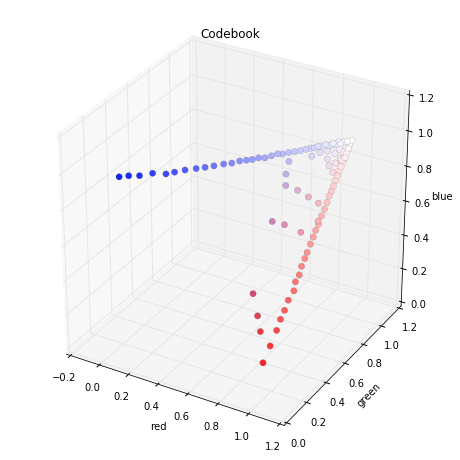

In [336]:
# Set up the figure
fig = plt.figure(figsize=(8, 8))

# Result of TSP solver
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*qpts.T, c=qpts, lw=0.1, s=40, alpha=1)
ax.plot(*qpts.T, color='k', alpha=0)
ax.set_title('Codebook')
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')

plt.show()

## Colinearity: all triples

In [315]:
from itertools import combinations

pidx = range(qpts.shape[0])
tridx = combinations(pidx, 3)

triples = np.array(list(combinations(qpts, 3)))

In [316]:
colin = 1 - np.power(np.abs(np.linalg.det(triples)), 0.25)  # 1 = colinear, 0 = not at all

In [317]:
import collections

In [318]:
z = collections.Counter()
for idx, tri, col in zip(tridx, triples, colin):
    if col > 0.8:
        for i in idx:
            z[i] += 1

In [319]:
z

Counter({0: 393,
         1: 527,
         2: 199,
         3: 286,
         4: 78,
         5: 424,
         6: 94,
         7: 195,
         8: 461,
         9: 481,
         10: 234,
         11: 485,
         12: 484,
         13: 346,
         14: 424,
         15: 77,
         16: 461,
         17: 207,
         18: 261,
         19: 474,
         20: 501,
         21: 515,
         22: 397,
         23: 376,
         24: 511,
         25: 558,
         26: 25,
         27: 422,
         28: 45,
         29: 588,
         30: 462,
         31: 223,
         32: 549,
         33: 483,
         34: 123,
         35: 419,
         36: 290,
         37: 156,
         38: 552,
         39: 443,
         40: 62,
         41: 412,
         42: 421,
         43: 433,
         44: 290,
         45: 671,
         46: 649,
         47: 376,
         48: 336,
         49: 158,
         50: 52,
         51: 483,
         52: 261,
         53: 490,
         54: 100,
         55: 580,
         

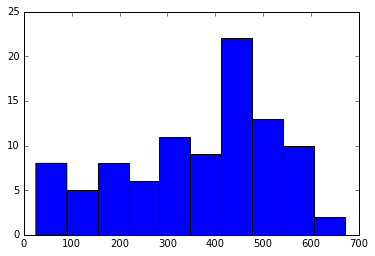

In [320]:
plt.hist(list(z.values()))
plt.show()

In [331]:
z = {k:v for k, v in z.items() if v > 400}

In [332]:
z

{1: 527,
 5: 424,
 8: 461,
 9: 481,
 11: 485,
 12: 484,
 14: 424,
 16: 461,
 19: 474,
 20: 501,
 21: 515,
 24: 511,
 25: 558,
 27: 422,
 29: 588,
 30: 462,
 32: 549,
 33: 483,
 35: 419,
 38: 552,
 39: 443,
 41: 412,
 42: 421,
 43: 433,
 45: 671,
 46: 649,
 51: 483,
 53: 490,
 55: 580,
 56: 601,
 58: 523,
 60: 445,
 63: 460,
 64: 552,
 65: 447,
 68: 543,
 69: 517,
 72: 461,
 74: 480,
 77: 453,
 78: 456,
 79: 448,
 81: 578,
 82: 441,
 87: 409,
 89: 459,
 91: 550,
 92: 445,
 93: 425}

In [333]:
pts = qpts[list(z.keys())]

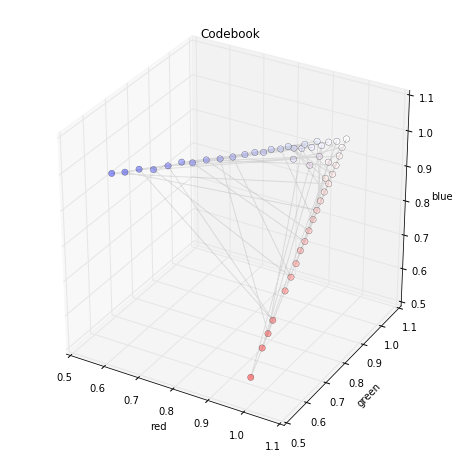

In [334]:
# Set up the figure
fig = plt.figure(figsize=(8, 8))

# Result of TSP solver
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*pts.T, c=pts, lw=0.2, s=40, alpha=1)
ax.plot(*pts.T, color='k', alpha=0.1)
ax.set_title('Codebook')
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')

plt.show()

<hr />

## Back to original workflow

Check below an interactive version of the 3D plot. May help when there are complicated paths between points. You need to install plotly and colorlover (with pip) if you don't already have them.

In [403]:
# import plotly.graph_objs as go
# import colorlover as cl
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

# cb = cl.to_rgb(tuple(map(tuple, c*255)))
# trace = go.Scatter3d(
#         name='TSP Sover',
#         x = c[:,0], y = c[:,1], z = c[:,2],
#         marker = dict(
#             size=4.,
#             color=cb
#         ),
#         line=dict(
#             color='#000',
#             width=1,
#         ),
#         )
# data = [trace]

# # Set the different layout properties of the figure:
# layout = go.Layout(
#     autosize=False,
#     width=600,
#     height=600,
#     margin = dict(
#         t=0,b=0,l=0,r=0
#     ),
#     scene = go.Scene(
#         xaxis=dict(
#             title='red',
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(255, 0, 0)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         ),
#         yaxis=dict(
#             title='green',
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(0, 255, 0)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         ),
#         zaxis=dict(
#             title='blue',
#             gridcolor='rgb(255, 255, 255)',
#             zerolinecolor='rgb(0, 0, 255)',
#             showbackground=True,
#             backgroundcolor='rgb(230, 230,230)'
#         ),
#         aspectmode='cube',
#         camera=dict( 
#             eye=dict(
#                 x=1.7,
#                 y=-1.7,
#                 z=1,
#             )
#         ),
#     )
# )

# fig = go.Figure(data=data, layout=layout)
# iplot(fig, show_link=False)

In [404]:
# np.save('/Users/matt/Dropbox/public/raw_data.npy', p[1:])
# np.save('/Users/matt/Dropbox/public/ordered_data.npy', c)

In [98]:
from scipy.spatial import KDTree, cKDTree

kdtree = cKDTree(c)

In [99]:
dx, ix = kdtree.query(im)

In [100]:
#%timeit kdtree.query(im)

In [101]:
# kdtree = KDTree(c)
# %timeit kdtree.query(im)
# 1 loop, best of 3: 2min 27s per loop

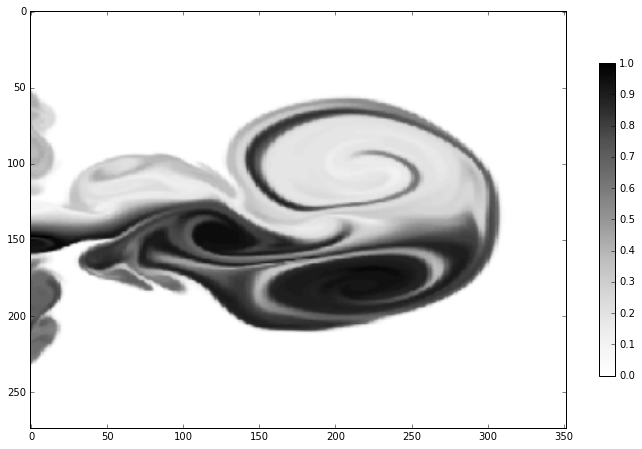

In [102]:
plt.figure(figsize=(12,8))
plt.imshow(dataspace[ix], cmap='Greys')
plt.colorbar(shrink=0.7)
plt.show()

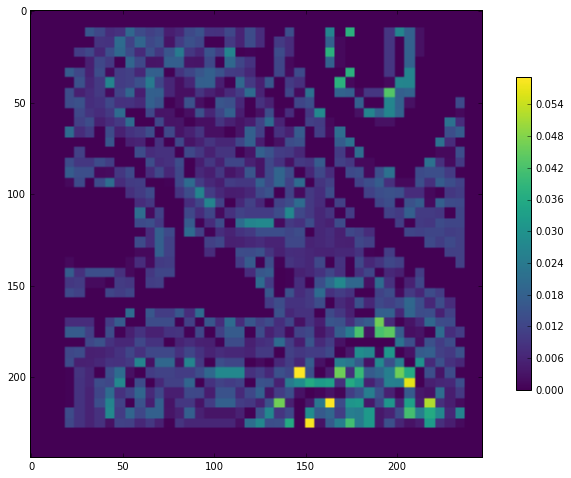

In [516]:
plt.figure(figsize=(12,8))
plt.imshow(dx, cmap='viridis')
plt.colorbar(shrink=0.7)
plt.show()

In [517]:
cd ~/Dropbox/dev/rainbow/notebooks

/home/matt/Dropbox/dev/rainbow/notebooks


In [518]:
pwd

'/home/matt/Dropbox/dev/rainbow/notebooks'

### NOT accounting for distance

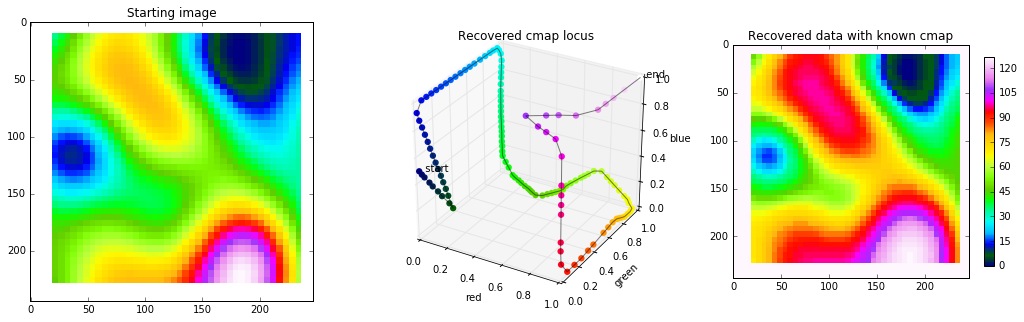

In [524]:
fig = plt.figure(figsize=(18, 5))

ax0 = fig.add_subplot(131)
plt.imshow(im, interpolation='none')
ax0.set_title("Starting image")

ax1 = fig.add_subplot(132, projection='3d')
ax1.scatter(*c.T, c=c, lw=0, s=40, alpha=1)
ax1.plot(*c.T, color='k', alpha=0.5)
ax1.text(*c[0], '  start')
ax1.text(*c[-1], '  end')
ax1.set_title("Recovered cmap locus")
ax1.set_xlabel('red')
ax1.set_ylabel('green')
ax1.set_zlabel('blue')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_zlim(0, 1)

ax2 = fig.add_subplot(133)
plt.imshow(ix, cmap='gist_ncar', interpolation='none')
plt.colorbar(shrink=0.75)
ax2.set_title("Recovered data with known cmap")

plt.savefig('basic_example.png', dpi=300)
plt.show()

### Accounting for distance

In [520]:
recovered = dataspace[ix].astype(np.float)
recovered -= np.mean(dataspace[ix])
recovered /= max(np.amax(recovered), np.abs(np.amin(recovered)))

In [521]:
z_out = dataspace[ix].astype(np.float)
z_out /= np.amax(z_out)

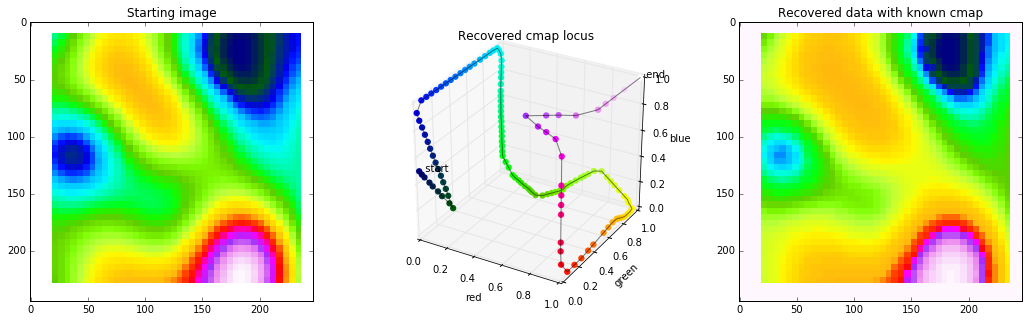

In [523]:
fig = plt.figure(figsize=(18, 5))

ax0 = fig.add_subplot(131)
plt.imshow(im, interpolation='none')
ax0.set_title("Starting image")

ax1 = fig.add_subplot(132, projection='3d')
ax1.scatter(*c.T, c=c, lw=0, s=40, alpha=1)
ax1.plot(*c.T, color='k', alpha=0.5)
ax1.text(*c[0], '  start')
ax1.text(*c[-1], '  end')
ax1.set_title("Recovered cmap locus")
ax1.set_xlabel('red')
ax1.set_ylabel('green')
ax1.set_zlabel('blue')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_zlim(0, 1)

ax2 = fig.add_subplot(133)
plt.imshow(recovered, cmap='gist_ncar', interpolation='none')
#plt.colorbar(shrink=0.75)
ax2.set_title("Recovered data with known cmap")

plt.savefig('basic_example.png', dpi=300)
plt.show()

In [417]:
cmaps = [('Perceptually Uniform Sequential',
                            ['viridis', 'inferno', 'plasma', 'magma']),
         ('Sequential',     ['Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
                             'copper', 'gist_heat', 'gray', 'hot',
                             'pink', 'spring', 'summer', 'winter']),
         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism'])]

## Recover the colourbar

In [451]:
# setting up color arrays
r1 = np.array(c)[:, 0] # value of Red for the nth sample
g1 = np.array(c)[:, 1] # value of Green for the nth sample
b1 = np.array(c)[:, 2] # value of Blue for the nth sample

r2 = r1 # value of Red at the nth sample
r0 = np.linspace(0, 1, len(r1)) # position of the nth Red sample within the range 0 to 1

g2 = g1 # value of Green at the nth sample
g0 = np.linspace(0, 1, len(g1)) # position of the nth Green sample within the range 0 to 1

b2 = b1 # value of Blue at the nth sample
b0 = np.linspace(0, 1, len(b1)) # position of the nth Blue sample within the range 0 to 1

# creating lists
R = zip(r0, r1, r2)
G = zip(g0, g1, g2)
B = zip(b0, b1, b2)

# creating list of above lists and transposing
RGB = zip(R, G, B)
rgb = zip(*RGB)
#print rgb

# creating dictionary
k = ['red', 'green', 'blue'] # makes list of keys
data_dict = dict(zip(k,rgb)) # makes a dictionary from list of keys and list of values

# Make a colourbar
import matplotlib.colors as clr

found_cmap = clr.LinearSegmentedColormap('my_colourmap', data_dict)

If we render the found data with the found colorbar, it will look perfect, because the colourbar is the codebook that maps the data to the original image.

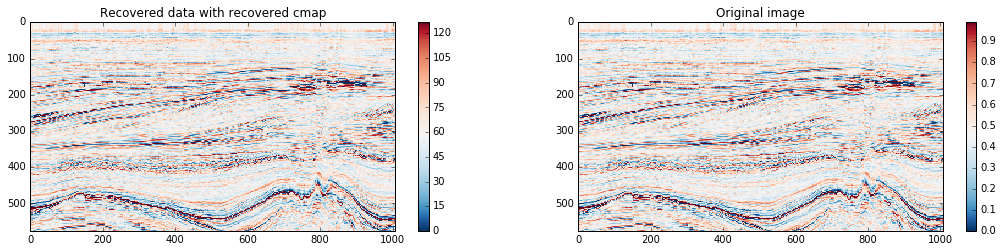

In [460]:
fig = plt.figure(figsize=(18, 5))

ax0 = fig.add_subplot(121)
plt.imshow(ix, cmap=found_cmap, interpolation='none')
plt.colorbar(shrink=0.75)
ax0.set_title("Recovered data with recovered cmap")

ax1 = fig.add_subplot(122)
plt.imshow(im, cmap=found_cmap, interpolation='none')
plt.colorbar(shrink=0.75)
ax1.set_title("Original image")

plt.show()

## Recovery with grayscale assumption

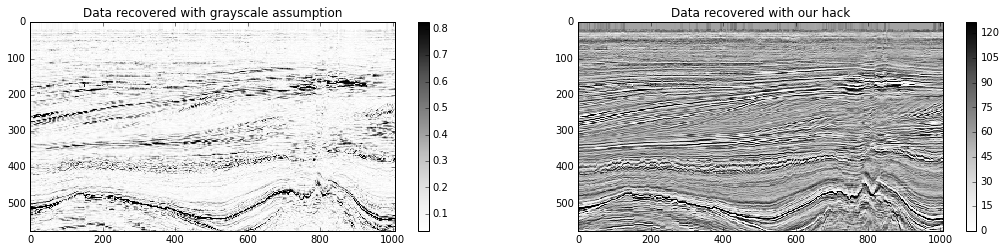

In [477]:
fig = plt.figure(figsize=(18, 5))

ax0 = fig.add_subplot(121)
plt.imshow(1-np.mean(im, axis=-1), cmap='Greys', interpolation='none')
plt.colorbar(shrink=0.75)
ax0.set_title("Data recovered with grayscale assumption")

ax1 = fig.add_subplot(122)
plt.imshow(ix, cmap='Greys', interpolation='none')
plt.colorbar(shrink=0.75)
ax1.set_title("Data recovered with our hack")

plt.savefig('compare_with_naive.png', dpi=300, bbox_inches='tight')

plt.show()

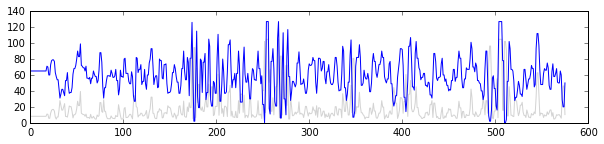

In [479]:
# Compare 50th 'trace'
plt.figure(figsize=(10, 2))

plt.plot(127 * (1-np.mean(im, axis=-1))[:, 50], 'lightgray')
plt.plot(ix[:, 50])

plt.savefig('compare_with_naive_2.png', dpi=300, bbox_inches='tight')

plt.show()

## Compare the result to what we started with

This only makes sense for the synthetic data, not the test images.

Scale everything to [0,1] and compare.

In [110]:
z_out = dataspace[ix].astype(np.float)
z_out /= np.amax(z_out)

In [111]:
np.amin(z_out), np.amax(z_out)

(0.0, 1.0)

In [112]:
z = z.astype(np.float)
z -= np.amin(z)
z /= np.amax(z)

In [113]:
np.amin(z), np.amax(z)

(0.0, 1.0)

In [114]:
z.shape, z_out.shape

((451, 299), (576, 1008))

In this example, the polarity of the recovered data is reversed.

EITHER set the coolpoint to `[0.1, 0, 0]`,

OR do this:

In [115]:
# z_out = 1 - z_out

The original data, `z`, is a different shape. At the risk of distorting it, let's resize it.

In [116]:
from scipy.misc import imresize

z_ = imresize(z, z_out.shape) / 255
z_ = imresize(z_out, z.shape) / 255

In [117]:
diff = z_ - z

In [118]:
def rms(a):
    return np.sqrt(np.sum(a**2)/a.size)

print("RMS difference: {:.4f}".format(rms(diff)))

RMS difference: 0.0698


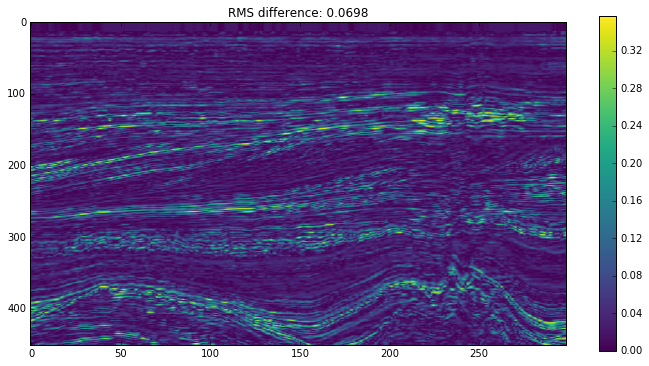

In [126]:
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(diff), aspect=0.4, cmap='viridis')
plt.colorbar(shrink=0.75)
plt.title("RMS difference: {:.4f}".format(rms(diff)))
plt.show()

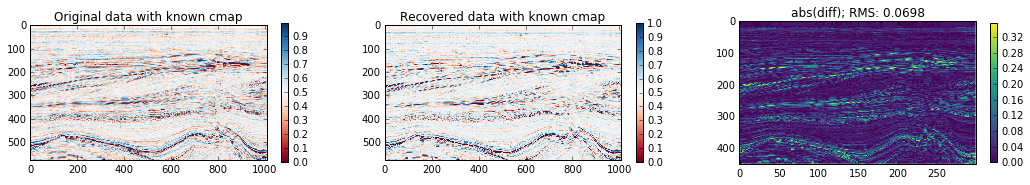

In [138]:
fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131)
plt.imshow(im, cmap=cmap)
plt.colorbar(shrink=0.5)
ax1.set_title("Original data with known cmap")

ax2 = fig.add_subplot(132)
plt.imshow(z_out, cmap=cmap, interpolation='none')
plt.colorbar(shrink=0.5)
ax2.set_title("Recovered data with known cmap")

ax3 = fig.add_subplot(133)
plt.imshow(abs(diff), interpolation='none', cmap='viridis', aspect=0.4)
plt.colorbar(shrink=0.5)
ax3.set_title("abs(diff); RMS: {:.4f}".format(rms(diff)))

plt.savefig('original-recovered-diff.png', dpi=300, bbox_inches='tight')

plt.show()

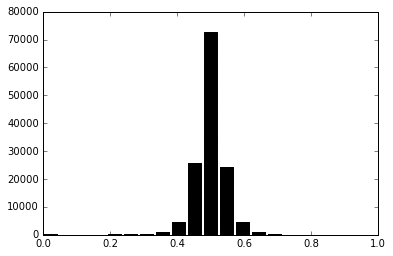

In [135]:
_ = plt.hist(z, bins=21, stacked=True)

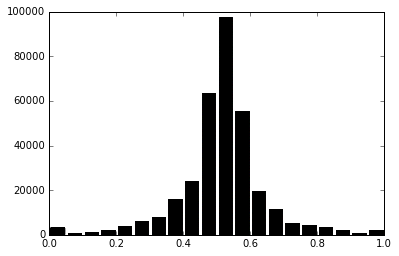

In [85]:
_ = plt.hist(z_out, bins=20, stacked=True)

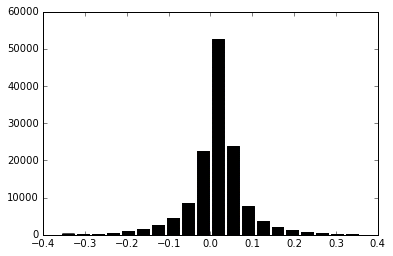

In [136]:
_ = plt.hist(diff, bins=20, stacked=True)

## Ways to improve this result

- Center the final histogram (at least need to compare them here).

## Testing function

In [458]:
cd ~/Dropbox/dev/rainbow/

/Users/matt/Dropbox/dev/rainbow


In [172]:
ls ..

LICENSE             errors.py           rainbow.py          templates/
README.md           mycarta_imtools.py  rainbow.wsgi*       urls.txt
__pycache__/        notebooks/          secrets.py          utils.py


In [175]:
from utils import image_to_data

ImportError: No module named 'boto3'

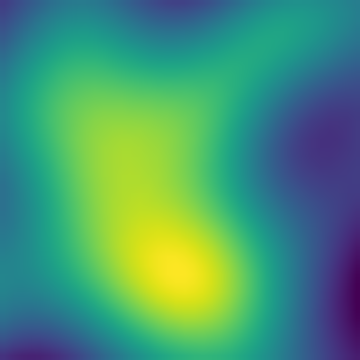

In [327]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# img = Image.open('data/cbar/boxer.png')
# img = Image.open('data/cbar/fluid.png')
# img = Image.open('data/cbar/lisa.png')
# img = Image.open('data/cbar/redblu.png')
# img = Image.open('data/cbar/seismic.png')
# img = Image.open('data/cbar/drainage.jpg')
img = Image.open('data/cbar/test.png')
img

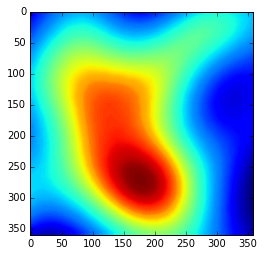

In [328]:
data = image_to_data(img)

plt.imshow(data)
plt.show()

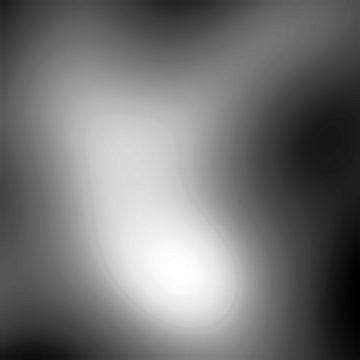

In [329]:
Image.fromarray(np.uint8(data*255))